In [13]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter
import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [3]:
path = kagglehub.dataset_download("myrios/news-sentiment-analysis")
df= pd.read_csv(path+"/news.csv")

100%|██████████| 28.8M/28.8M [00:00<00:00, 84.3MB/s]

Extracting files...


In [4]:
print(f"number of null values: {df.isnull().sum().sum()}")
print(f"number of duplicates: {df.duplicated().sum()}")
print(f"number of rows: {df.shape[0]}")
print(f"number of columns: {df.shape[1]}")

number of null values: 0
number of duplicates: 0
number of rows: 427482
number of columns: 7


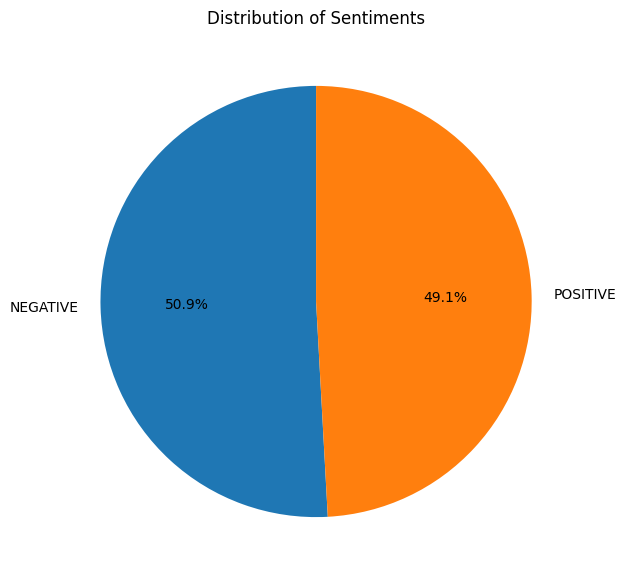

In [6]:
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sentiments")
plt.show()

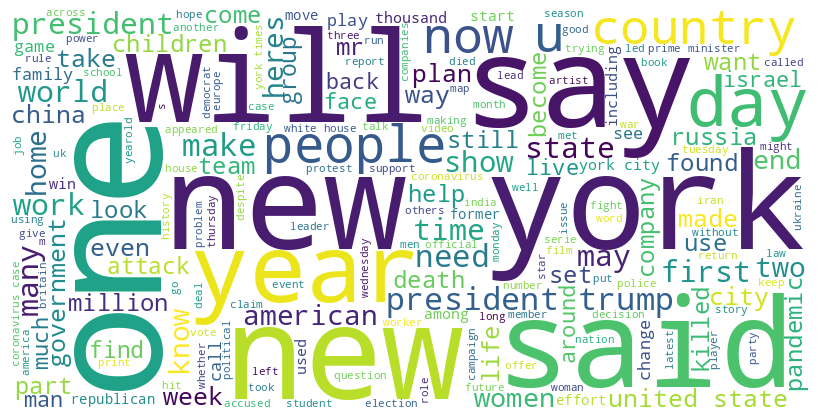

In [8]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['news'].apply(preprocess_text)


text = " ".join(df['clean_text'].astype(str))


wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=set(STOPWORDS),
                      min_font_size=10).generate(text)


plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


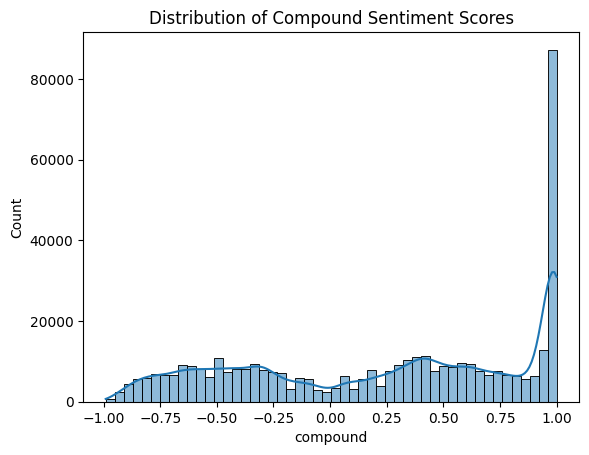

In [10]:
sns.histplot(df['compound'], bins=50, kde=True)
plt.title("Distribution of Compound Sentiment Scores")
plt.show()

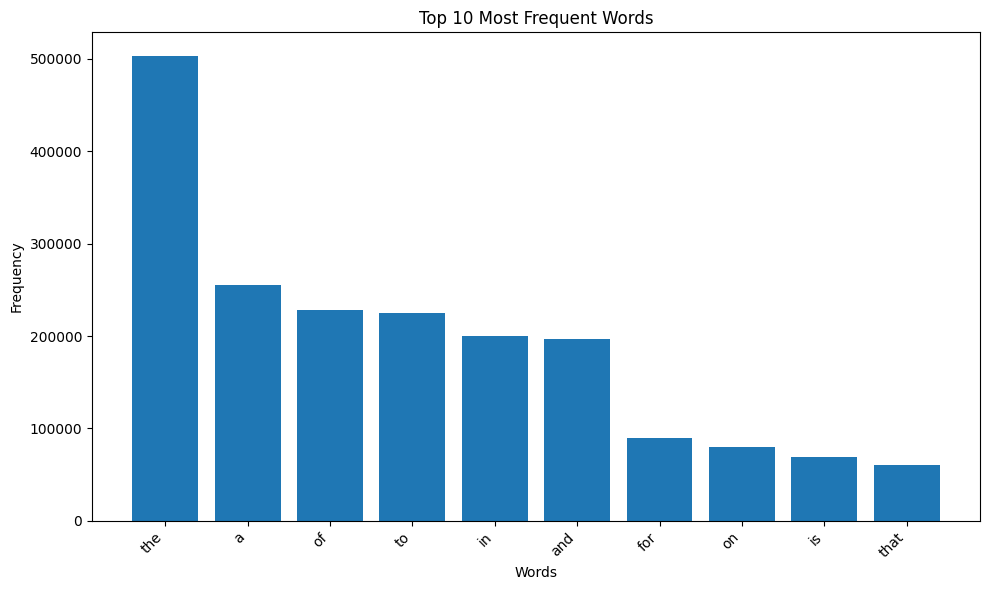

In [12]:
word_counts = Counter(" ".join(df['clean_text']).split())

top_10_words = word_counts.most_common(10)

words, counts = zip(*top_10_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Words")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
